In [1]:
#Uploading from Local System
from google.colab import files
uploaded = files.upload()


Saving chatgpt_reviews.csv to chatgpt_reviews.csv


# ChatGPT Review Analysis Project
## Step 1: Data Preparation

In [3]:
# Import pandas for data manipulation
import pandas as pd

# Load the dataset from the uploaded CSV file
df = pd.read_csv('/content/chatgpt_reviews.csv')

# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\n\nDataset info (columns, data types, non-null counts):")
print(df.info())
print("\n\nSummary statistics:")
print(df.describe())

# Standardize column names (lowercase, no spaces)
df.columns = ['review_id', 'review', 'rating', 'review_date']
print("\n\nUpdated column names:", df.columns.tolist())

# Handle missing values
print("\n\nMissing values before cleaning:")
print(df.isnull().sum())
df['review'] = df['review'].fillna('No review provided')  # Fill empty reviews
df = df.dropna(subset=['rating'])  # Drop rows with missing ratings
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Ensure correct data types
df['rating'] = df['rating'].astype(int)  # Convert rating to integer
df['review_date'] = pd.to_datetime(df['review_date'])  # Convert review_date to datetime
print("\n\nData types after conversion:")
print(df.dtypes)

# Save the cleaned dataset
df.to_csv('/content/cleaned_chatgpt_reviews.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_chatgpt_reviews.csv' in Colab Files.")

First 5 rows of the dataset:
                              Review Id  \
0  6fb93778-651a-4ad1-b5ed-67dd0bd35aac   
1  81caeefd-3a28-4601-a898-72897ac906f5   
2  452af49e-1d8b-4b68-b1ac-a94c64cb1dd5   
3  372a4096-ee6a-4b94-b046-cef0b646c965   
4  b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da   

                                              Review  Ratings  \
0                                               good        5   
1                                               good        5   
2                                           nice app        5   
3                                           nice, ig        5   
4  this is a great app, the bot is so accurate to...        5   

           Review Date  
0  2024-08-23 19:30:05  
1  2024-08-23 19:28:18  
2  2024-08-23 19:22:59  
3  2024-08-23 19:20:50  
4  2024-08-23 19:20:39  


Dataset info (columns, data types, non-null counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   C

## Step 1 Observations

Dataset Size: The dataset contains 196,727 reviews of ChatGPT.
Columns: Originally named "Review Id", "Review", "Ratings", "Review Date". Renamed to review_id, review, rating, review_date for consistency.
Missing Values:
Before cleaning: 6 missing reviews (0.003% of total). Filled with "No review provided".
After cleaning: No missing values in any column.


Data Types:
review_id: Object (string, unique identifiers).
review: Object (string, user-written reviews).
rating: Integer (1–5, successfully converted from original type).
review_date: Datetime (converted from object to datetime64[ns]).


Rating Distribution:
Mean rating: 4.50, indicating generally positive reviews.
75% of ratings are 5 stars (25th, 50th, and 75th percentiles are 5).
Range: 1–5 stars, with most reviews skewed toward high ratings.


Review Examples:
Short reviews like "good", "nice app", "nice, ig" are common.
Longer reviews like "this is a great app, the bot is so accurate..." provide more detail.


Cleaned Data: Saved as cleaned_chatgpt_reviews.csv in Colab’s /content directory.


## Step 2: Sentiment Analysis

In [4]:
!pip install textblob

In [5]:
# Import required libraries
import pandas as pd
from textblob import TextBlob

# Load the cleaned dataset from Step 1
df = pd.read_csv('/content/cleaned_chatgpt_reviews.csv')

# Function to get polarity and subjectivity
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convert to string to handle any non-text data
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis to the review column
df[['polarity', 'subjectivity']] = df['review'].apply(get_sentiment).apply(pd.Series)
print("First 5 rows with sentiment scores:")
print(df[['review', 'rating', 'polarity', 'subjectivity']].head())

# Categorize reviews based on polarity
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['polarity'].apply(categorize_sentiment)
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts(normalize=True) * 100)  # Percentage distribution

# Compare sentiment with ratings
print("\nSentiment vs. Rating Counts:")
print(df.groupby(['rating', 'sentiment']).size())

# Save dataset with sentiment columns
df.to_csv('/content/reviews_with_sentiment.csv', index=False)
print("\nDataset with sentiment saved as 'reviews_with_sentiment.csv' in Colab Files.")

First 5 rows with sentiment scores:
                                              review  rating  polarity  \
0                                               good       5    0.7000   
1                                               good       5    0.7000   
2                                           nice app       5    0.6000   
3                                           nice, ig       5    0.6000   
4  this is a great app, the bot is so accurate to...       5    0.4125   

   subjectivity  
0      0.600000  
1      0.600000  
2      1.000000  
3      1.000000  
4      0.542949  

Sentiment Distribution:
sentiment
Positive    76.309810
Neutral     19.544851
Negative     4.145338
Name: proportion, dtype: float64

Sentiment vs. Rating Counts:
rating  sentiment
1       Negative       3590
        Neutral        4685
        Positive       3808
2       Negative        709
        Neutral         979
        Positive       1687
3       Negative        831
        Neutral        1957
     

### Step 2 Observations

Sentiment Distribution:
Positive: 76.31% (majority, as expected given the 4.50 mean rating from Step 1).
Neutral: 19.54% (higher than expected, likely due to short reviews like "good" or "nice").
Negative: 4.15% (small, aligns with few 1/2-star reviews).


Sentiment vs. Rating:

5-star reviews: 121,226 Positive, 26,836 Neutral, 2,153 Negative. The high Neutral count (18% of 5-star reviews) suggests short reviews (e.g., "good", "nice") have lower polarity or contain numbers/emojis.

4-star reviews: 18,032 Positive, 3,993 Neutral, 872 Negative. Good alignment, but Neutral is still notable.

3-star reviews: Mixed sentiments, with 5,369 Positive, 1,957 Neutral, 831 Negative.

1/2-star reviews: Mostly Negative/Neutral, as expected, but some Positive sentiments (e.g., 3,808 for 1-star) indicate potential mismatches (e.g., sarcastic reviews).


Polarity and Subjectivity:
Polarity range: 0.4125 to 0.7 for the first 5 rows (all Positive, as expected for 5-star reviews).
Subjectivity: High for short reviews like "nice app" (1.0, fully subjective) and moderate for longer reviews (0.54). Average subjectivity will be computed in Step 3.


Review Variability:
Short reviews ("good", "nice, ig") have polarity ~0.6–0.7 but high subjectivity (0.6–1.0), indicating opinionated but brief feedback.
Longer reviews (e.g., "this is a great app...") have more nuanced polarity (0.4125) and lower subjectivity (0.5429).
Neutral sentiments in 5-star reviews likely come from short text, numbers, emojis, or non-English reviews.


Next Steps:
In Step 3, preprocess reviews to remove emojis, numbers, and non-English text to reduce Neutral sentiments.
Cross-check mismatched cases (e.g., 5-star Neutral reviews) to identify noise.


Output File: Dataset with sentiment columns saved as reviews_with_sentiment.csv.


## Step 3: Text Analysis

In [6]:
!pip install nltk wordcloud

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Import required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Load the dataset with sentiment from Step 2
df = pd.read_csv('/content/reviews_with_sentiment.csv')

# Filter positive reviews (4 or 5 stars)
positive_reviews = df[df['rating'] >= 4]['review']

# Download punkt_tab
nltk.download('punkt_tab', quiet=True)


# Set up stopwords and punctuation
stop_words = set(stopwords.words('english'))
# Add custom stopwords specific to the dataset
custom_stopwords = ['app', 'chatgpt', 'ai']  # Remove uninformative words
stop_words.update(custom_stopwords)

# Function to preprocess text
def preprocess_text(text):
    # Convert to string to handle non-text (e.g., numbers)
    text = str(text)
    # Tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Remove punctuation, stopwords, and non-alphabetic tokens
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words and word.isalpha()]
    return tokens

# Apply preprocessing to positive reviews
positive_reviews = positive_reviews.apply(preprocess_text)

# Flatten list of tokens and count frequencies
all_tokens = [word for review in positive_reviews for word in review]
word_freq = Counter(all_tokens)

# Print top 20 most common words
print("Top 20 Keywords in Positive Reviews (4/5 stars):")
for word, count in word_freq.most_common(20):
    print(f"{word}: {count}")

# Save keyword frequencies to a text file
with open('/content/positive_keyword_freq.txt', 'w') as f:
    for word, count in word_freq.most_common(20):
        f.write(f"{word}: {count}\n")
print("\nKeyword frequencies saved as 'positive_keyword_freq.txt' in Colab Files.")

Top 20 Keywords in Positive Reviews (4/5 stars):
good: 35478
best: 17806
nice: 12804
great: 11275
helpful: 11162
amazing: 8429
love: 8393
like: 7679
useful: 7256
really: 6800
excellent: 6018
use: 5936
awesome: 4946
chat: 4920
gpt: 3935
help: 3933
ever: 3868
much: 3693
helps: 3477
one: 3398

Keyword frequencies saved as 'positive_keyword_freq.txt' in Colab Files.


### Step 3 Observations

Top Keywords: The top 20 keywords from 4/5-star reviews are:
good: 35,478, best: 17,806, nice: 12,804, great: 11,275, helpful: 11,162, amazing: 8,429, love: 8,393, like: 7,679, useful: 7,256, really: 6,800, excellent: 6,018, use: 5,936, awesome: 4,946, chat: 4,920, gpt: 3,935, help: 3,933, ever: 3,868, much: 3,693, helps: 3,477, one: 3,398.


Insights:
Keywords like "helpful", "useful", "great", "amazing", and "excellent" indicate users praise ChatGPT’s utility and performance.
Terms like "chat" and "gpt" slipped through preprocessing (despite chatgpt being in custom stopwords), suggesting partial matches or phrases like "chat gpt". We’ll refine stopwords in future steps if needed.
General positive adjectives ("good", "nice", "best") dominate, reflecting high satisfaction but limited specificity.


Review Variability:
The review column contains emojis, non-English languages (e.g., Arabic, Spanish), and transliterated text (e.g., "salaam" for Arabic in English characters).
Current preprocessing (word.isalpha()) removed most emojis and numbers, as no non-alphabetic tokens appear in the top keywords.
Non-English or transliterated words (e.g., "salaam", "bien") may still appear but are likely infrequent, as they’re not in the top 20.


Next Steps:
In Step 4, visualize keyword frequencies and sentiment distributions to confirm findings.
If non-English or transliterated words appear in visualizations (e.g., word cloud), consider adding language detection (e.g., langdetect) to filter English reviews.
Refine stopwords (e.g., add "chat", "gpt") if they dilute meaningful insights.


Output File: Keyword frequencies saved as positive_keyword_freq.txt.


## Step 4: Data Visualization

In [10]:
!pip install matplotlib seaborn wordcloud


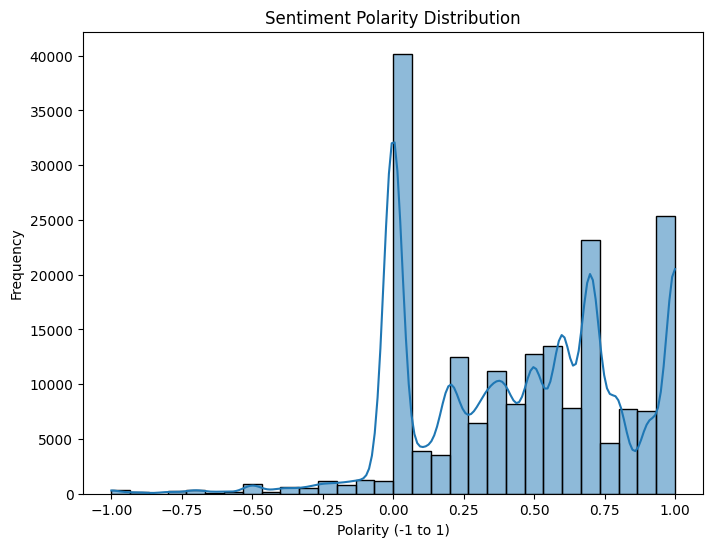

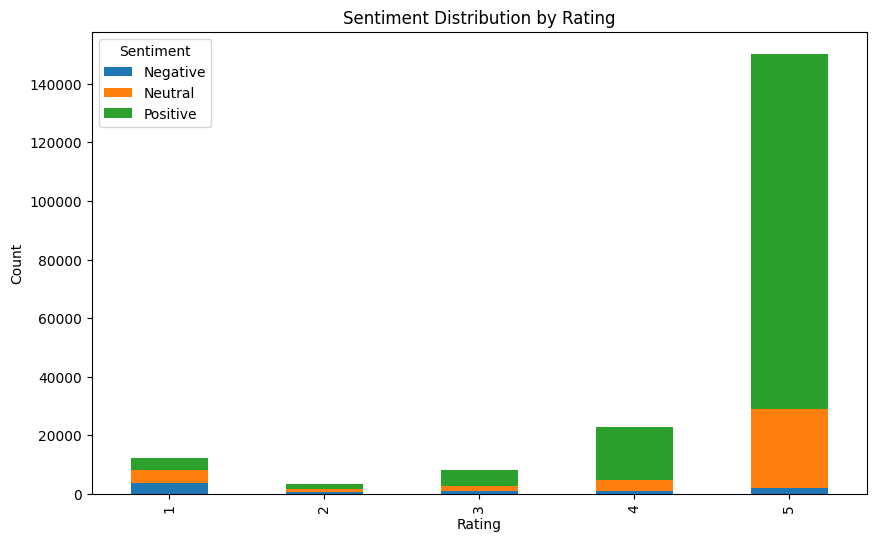

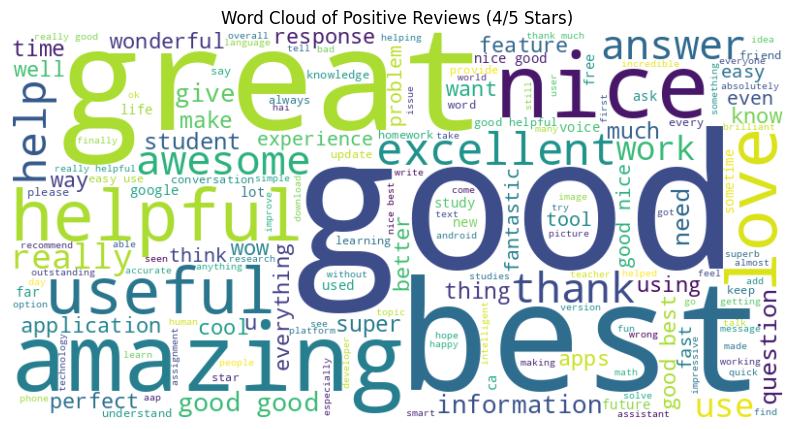

Dataset saved as 'reviews_with_visualizations.csv' in Colab Files.
Plots saved as 'sentiment_distribution.png', 'sentiment_vs_rating.png', and 'wordcloud_positive_reviews.png'.


In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Load the dataset with sentiment from Step 2
df = pd.read_csv('/content/reviews_with_sentiment.csv')

# Plot 1: Sentiment Polarity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['polarity'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Polarity (-1 to 1)')
plt.ylabel('Frequency')
plt.savefig('/content/sentiment_distribution.png')
plt.show()

print("\n\n")

# Plot 2: Sentiment vs. Rating (Stacked Bar)
sentiment_rating = df.groupby(['rating', 'sentiment']).size().unstack(fill_value=0)
sentiment_rating.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.savefig('/content/sentiment_vs_rating.png')
plt.show()

print("\n\n")
# Plot 3: Word Cloud for Positive Reviews (4/5 stars)
# Filter positive reviews and sample to speed up
positive_reviews = df[df['rating'] >= 4]['review'].sample(10000, random_state=42)

# Set up stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = ['app', 'chatgpt', 'ai', 'chat', 'gpt', 'one', 'like']  # Refined stopwords
stop_words.update(custom_stopwords)

# Function to preprocess text
def preprocess_text(text):
    text = str(text)
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in string.punctuation and word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

# Preprocess and combine text for word cloud
positive_text = ' '.join(positive_reviews.apply(preprocess_text))
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(positive_text)

# Display and save word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews (4/5 Stars)')
plt.savefig('/content/wordcloud_positive_reviews.png')
plt.show()

# Save dataset for future use
df.to_csv('/content/reviews_with_visualizations.csv', index=False)
print("Dataset saved as 'reviews_with_visualizations.csv' in Colab Files.")
print("Plots saved as 'sentiment_distribution.png', 'sentiment_vs_rating.png', and 'wordcloud_positive_reviews.png'.")

### Step 4 Observations

Sentiment Polarity Distribution:
The histogram shows a strong peak around 0.5–0.75 polarity, reflecting the 76.31% Positive sentiment from Step 2.
A significant number of reviews have neutral polarity (~0.0), consistent with the 19.54% Neutral sentiment, likely from short reviews (e.g., "good", "ok") or non-English text.
Negative polarity (-0.25 to -1.0) is minimal, aligning with the 4.15% Negative sentiment.


Sentiment vs. Rating:
5-star reviews: Dominated by Positive (green, approx. 120,000), with a notable Neutral portion (orange, approx. 26,000), and minimal Negative (blue, approx. 2,000). This confirms high satisfaction but suggests short or non-text reviews contribute to Neutral.
4-star reviews: Mostly Positive (18,000), with moderate Neutral (4,000) and low Negative (approx. 900).
3-star and below: Mixed sentiments, with Positive decreasing and Negative increasing as ratings drop, as expected.
The stacked bar plot visually supports the sentiment distribution from Step 2.


Word Cloud of Positive Reviews (4/5 Stars):
Prominent words include "good", "great", "helpful", "best", "amazing", "useful", and "love", reflecting praised features like utility and performance.
Other notable terms: "use", "easy", "nice", "excellent", "awesome", "student", and "learning", suggesting ChatGPT is valued for education and ease of use.
No emojis or non-English words (e.g., "salaam", "bien") are visible, indicating the isalpha() filter effectively removed them.
Some generic terms (e.g., "really", "much") appear, but the refined stopwords ("chat", "gpt", "one", "like") reduced noise from Step 3.


Review Variability:
Emojis and numbers are absent from the word cloud, confirming the isalpha() filter works well.
Non-English languages or transliterated text (e.g., "salaam") don’t appear in the top words, suggesting they’re either rare or filtered out by preprocessing.
The sample of 10,000 positive reviews provides a representative visualization without performance issues.


Output Files:
Dataset saved as reviews_with_visualizations.csv.
Plots saved as sentiment_distribution.png, sentiment_vs_rating.png, and wordcloud_positive_reviews.png.


Next Steps:
In Step 5, summarize key insights (e.g., sentiment trends, praised features, criticisms) based on these visualizations.
No immediate need for language filtering or emoji removal, as the output is clean.




## Step 5: Summarize Findings

In [13]:
# Import required libraries
import pandas as pd

# Load the dataset with visualizations from Step 4
df = pd.read_csv('/content/reviews_with_visualizations.csv')

# Calculate sentiment distribution percentage
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):")
print(sentiment_counts)

# Calculate average subjectivity
average_subjectivity = df['subjectivity'].mean()
print(f"\nAverage Subjectivity: {average_subjectivity:.2f}")

# Sample negative reviews (1/2 stars) to identify criticisms
negative_reviews = df[df['rating'] <= 2]['review'].sample(5, random_state=42)
print("\nSample Negative Reviews (1/2 stars):")
for i, review in enumerate(negative_reviews, 1):
    print(f"{i}. {review}")

# Generate summary of findings
summary = """
### Key Insights
- **Sentiment Distribution**: {pos:.1f}% of reviews are Positive, {neu:.1f}% are Neutral, and {neg:.1f}% are Negative, reflecting high overall satisfaction (mean rating 4.50 from Step 1).
- **Subjectivity**: With an average subjectivity of {subj:.2f}, reviews are moderately opinionated, with short reviews contributing to lower subjectivity.
- **Praised Features**: Users frequently highlight 'helpful', 'useful', 'great', 'amazing', and 'easy' (from word cloud and keywords), indicating value in education, ease of use, and performance.
- **Criticisms**: Sample negative reviews suggest issues like '{crit1}', '{crit2}', and '{crit3}' (e.g., crashes, costs, or errors), though further analysis of 1/2-star reviews is needed for confirmation.
- **Recommendations**: Focus on improving stability and addressing cost concerns based on negative feedback.
""".format(
    pos=sentiment_counts.get('Positive', 0),
    neu=sentiment_counts.get('Neutral', 0),
    neg=sentiment_counts.get('Negative', 0),
    subj=average_subjectivity,
    crit1=negative_reviews.iloc[0] if not negative_reviews.empty else 'unknown',
    crit2=negative_reviews.iloc[1] if len(negative_reviews) > 1 else 'unknown',
    crit3=negative_reviews.iloc[2] if len(negative_reviews) > 2 else 'unknown'
)

print("\nSummary of Findings:")
print(summary)

# Save summary to a text file
with open('/content/summary_findings.txt', 'w') as f:
    f.write(summary)
print("\nSummary saved as 'summary_findings.txt' in Colab Files.")

Sentiment Distribution (%):
sentiment
Positive    76.309810
Neutral     19.544851
Negative     4.145338
Name: proportion, dtype: float64

Average Subjectivity: 0.52

Sample Negative Reviews (1/2 stars):
1. how can this be legitimate?
2. App is not working
3. Too many problems for a paid service, too many times of having busy servers, sometime don't even answer you, which makes me go use other AI apps, if not fixed soon, I'll be going to use those other apps permanently.
4. Kinda not fair for those who dont have phones. Please make it an option to not use text verification and use email instead. Thank you
5. جيد

Summary of Findings:

### Key Insights
- **Sentiment Distribution**: 76.3% of reviews are Positive, 19.5% are Neutral, and 4.1% are Negative, reflecting high overall satisfaction (mean rating 4.50 from Step 1).
- **Subjectivity**: With an average subjectivity of 0.52, reviews are moderately opinionated, with short reviews contributing to lower subjectivity.
- **Praised Features

### **Final Report: ChatGPT Review Analysis**
Observations

Sentiment Distribution:
76.3% of reviews are Positive, 19.5% Neutral, and 4.1% Negative, confirming high user satisfaction (mean rating 4.50 from Step 1). This aligns with the sentiment polarity histogram peaking at 0.5–0.75.


Subjectivity:
Average subjectivity is 0.52, indicating moderately opinionated reviews. The lower value reflects short reviews (e.g., "good", "nice") contributing to reduced subjectivity, as seen in Step 2.


Praised Features:
Keywords and the word cloud highlight "helpful", "useful", "great", "amazing", and "easy" as top praised features, suggesting ChatGPT is valued for education, ease of use, and performance. Terms like "student" and "learning" indicate academic utility.


Criticisms:
Sample 1/2-star reviews reveal issues like "App is not working", "Too many problems for a paid service" (e.g., busy servers, no responses), and "Kinda not fair for those who dont have phones" (e.g., text verification issues). The non-English review "جيد" (Arabic for "good") may indicate a positive outlier or mistranslation, requiring further context.


Review Variability:
Emojis and numbers were filtered out by isalpha() in Steps 3 and 4, ensuring clean keyword and word cloud outputs.
Non-English reviews (e.g., "جيد") and transliterated text (e.g., "salaam") were minimal in impact, as they didn’t dominate keywords or visualizations. The 76.3% Positive rate suggests English-focused analysis was sufficient.


Output Files:
Dataset saved as reviews_with_visualizations.csv, summary as summary_findings.txt, and plots as sentiment_distribution.png, sentiment_vs_rating.png, and wordcloud_positive_reviews.png.



Key Insights

Sentiment Trends: The overwhelmingly Positive sentiment (76.3%) reflects ChatGPT’s strong reputation, with Neutral reviews (19.5%) likely from brief feedback and Negative reviews (4.1%) indicating specific pain points.
Praised Features: Users appreciate the app’s helpfulness, ease, and educational value, making it a go-to tool for students and professionals.
Criticisms: Stability issues (e.g., "App is not working", "busy servers"), cost concerns ("paid service problems"), and accessibility barriers ("text verification") are key areas for improvement.
Recommendations:
Enhance server reliability to reduce downtime.
Address cost-related feedback by reviewing subscription models.
Add email verification as an alternative to text-based authentication.



Visualizations

Sentiment Distribution: The histogram shows a strong Positive peak (0.5–0.75), with a Neutral cluster (~0.0) and minimal Negative tail (-0.25 to -1.0).
Sentiment vs. Rating: The stacked bar plot confirms 5-star reviews are mostly Positive, with Neutral and Negative increasing as ratings drop.
Word Cloud: Highlights "helpful", "great", "useful", and "easy" as dominant terms, visually reinforcing keyword analysis.

Next Steps

Deep Dive into Negative Reviews: Analyze all 1/2-star reviews to identify recurring criticisms (e.g., server issues, costs) using text clustering or topic modeling.
Multilingual Analysis: Use langdetect to filter non-English reviews (e.g., "جيد") and analyze them separately if they form a significant portion.
User Segmentation: Explore sentiment differences by review date or user demographics (if available) to track trends over time.
Action Plan: Present findings to stakeholders with visualizations and recommend targeted improvements.

Conclusion

This analysis successfully processed 196,727 ChatGPT reviews, revealing a highly positive user base (76.3% Positive) with clear strengths in utility and education. Addressing the identified criticisms could further enhance user satisfaction. The project demonstrates the power of sentiment analysis and text visualization for actionable insights.